In [7]:
import os
import pandas as pd
import nltk
import re
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.stem.snowball import SnowballStemmer


In [8]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer("english")

In [9]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens




In [10]:
os.chdir(r"C:\Users\SpirosAvgoustatos\Desktop\DATATHON DATASET")


In [11]:
occupations=pd.read_csv("o.csv")
skills=pd.read_csv("s.csv")
relations=pd.read_csv("osr.csv")


In [15]:
occupations=occupations[['conceptUri','preferredLabel','altLabels','scopeNote','description']]
skills=skills[['conceptUri','skillType','reuseLevel','preferredLabel','altLabels','description']]

In [16]:
occupations=occupations.rename(columns={"conceptUri": "Occ_Uri", "preferredLabel": "Occ_title", "altLabels": "Alt_Occ_title", "scopeNote": "Occ_scope", "description": "Occ_description"})
skills=skills.rename(columns={"conceptUri": "skill_Uri", "skillType": "skill_type","reuseLevel": "skill_reuse_level", "preferredLabel": "skill_title","altLabels": "alt_skill_title", "description": "skill_description"})
relations=relations.rename(columns={"occupationUri": "Occ_Uri","relationType": "relationType","skillType": "skillType","skillUri": "skill_Uri"})

In [17]:
temp=occupations.merge(relations, left_on='Occ_Uri', right_on='Occ_Uri')
occ_skills=temp.merge(skills, left_on='skill_Uri', right_on='skill_Uri')


In [19]:
occ_skills["alt_skill_title"]=occ_skills["alt_skill_title"].fillna('')
occ_skills["alt_skill_title"]=occ_skills["alt_skill_title"].replace(r'\n',' ', regex=True) 

In [20]:
occ_skills["Alt_Occ_title"]=occ_skills["Alt_Occ_title"].fillna('')
occ_skills["Alt_Occ_title"]=occ_skills["Alt_Occ_title"].replace(r'\n',' ', regex=True) 

In [21]:
occ_skills["Occ_description"]=occ_skills["Occ_description"].fillna('')
occ_skills["Occ_description"]=occ_skills["Occ_description"].replace(r'\n',' ', regex=True) 

In [22]:
by_occ=occ_skills.groupby(['Occ_title'], as_index = False).agg(lambda x: ','.join(x.unique())) 



In [23]:
by_occ

,Occ_title,Occ_Uri,Alt_Occ_title,Occ_description,relationType,skillType,skill_Uri,skill_type,skill_reuse_level,skill_title,alt_skill_title,skill_description
0,3D animator,http://data.europa.eu/esco/occupation/52df9d56...,3D animators computer-generated imagery animat...,3D animators are in charge of animating 3D mod...,"optional,essential","skill/competence,knowledge",http://data.europa.eu/esco/skill/0e1fe34b-f4e7...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","manage schedule of tasks,confer on artwork,use...",schedule tasks organise tasks organize tasks t...,Maintain an overview of all the incoming tasks...
1,3D modeller,http://data.europa.eu/esco/occupation/bab5fa79...,3D modellers 3D texturing artist CGI modeller ...,"3D modellers design 3D models of objects, virt...","optional,essential","skill/competence,knowledge",http://data.europa.eu/esco/skill/744442ac-c157...,"skill/competence,knowledge","cross-sector,sector-specific,transversal,occup...","perform ICT troubleshooting,geographic informa...",undertake ICT troubleshooting performing ICT ...,"Identify problems with servers, desktops, prin..."
2,3D printing technician,http://data.europa.eu/esco/occupation/4cf7be91...,3D printing operator printing machine technici...,3D Printing technicians assist in the designin...,"optional,essential","knowledge,skill/competence",http://data.europa.eu/esco/skill/59ea80e1-463a...,"knowledge,skill/competence","cross-sector,sector-specific","technical drawings,use technical drawing softw...",mechanical drawings specialised drawings techn...,"Drawing software and the various symbols, pers..."
3,ATM repair technician,http://data.europa.eu/esco/occupation/490d0c6f...,automated teller machine repair technician ATM...,"ATM repair technicians install, diagnose, main...","essential,optional","skill/competence,knowledge",http://data.europa.eu/esco/skill/334e3e49-fb02...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","troubleshoot,perform test run,electronics,inst...",troubleshooting identify problems troubleshoot...,"Identify operating problems, decide what to do..."
4,Freinet school teacher,http://data.europa.eu/esco/occupation/8befd482...,Freinet school teaching practitioner Freinet p...,Freinet school teachers educate students using...,"essential,optional","skill/competence,knowledge",http://data.europa.eu/esco/skill/07090471-265a...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","manage children's problems,guarantee students'...",manage a child's problems manage problems of c...,"Promote the prevention, early detection, and m..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2937,zoo educator,http://data.europa.eu/esco/occupation/7c5e4ca1...,education instructor learning officer conserva...,Zoo educators teach visitors about the animals...,"essential,optional","skill/competence,knowledge",http://data.europa.eu/esco/skill/b216d9a2-7d4e...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","ensure cross-department cooperation,apply teac...",ensure cooperation cross-department ensure cro...,Guarantee communication and cooperation with a...
2938,zoo registrar,http://data.europa.eu/esco/occupation/e7417f4f...,animal record keeper animal records coordinato...,Zoo registrars are responsible for the mainten...,"optional,essential","skill/competence,knowledge",http://data.europa.eu/esco/skill/a571ae14-3e16...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","inspect data,ensure cross-department cooperati...",check data data inspection assess data inspect...,"Analyse, transform and model data in order to ..."
2939,zoo section leader,http://data.europa.eu/esco/occupation/62204bd8...,team leader - large mammals section leader - g...,Zoo section leaders are responsible for managi...,"optional,essential","skill/competence,knowledge",http://data.europa.eu/esco/skill/21c5790c-0930...,"skill/com

In [24]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in by_occ["skill_title"]:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [27]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 391276 items in vocab_frame


In [28]:
print(vocab_frame.head())

            words
manag      manage
schedul  schedule
of             of
task        tasks
confer     confer


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(by_occ["skill_title"]) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 14.5 s
(2942, 65)


In [30]:
terms = tfidf_vectorizer.get_feature_names()


In [32]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


In [35]:
from sklearn.cluster import KMeans

num_clusters = 10

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 27 s


In [36]:
clusters

[0,
 0,
 2,
 8,
 0,
 7,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 8,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 7,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 1,
 5,
 5,
 5,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 4,
 0,
 6,
 6,
 9,
 9,
 5,
 0,
 9,
 9,
 8,
 9,
 7,
 5,
 8,
 7,
 0,
 7,
 8,
 8,
 7,
 1,
 0,
 0,
 7,
 0,
 0,
 0,
 9,
 5,
 1,
 9,
 3,
 3,
 7,
 7,
 3,
 3,
 3,
 7,
 7,
 7,
 1,
 5,
 7,
 3,
 7,
 7,
 7,
 7,
 5,
 7,
 5,
 7,
 0,
 7,
 7,
 3,
 3,
 5,
 3,
 5,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 5,
 5,
 0,
 0,
 1,
 8,
 8,
 5,
 5,
 6,
 9,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 8,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 9,
 9,
 9,
 8,
 7,
 9,
 5,
 5,
 0,
 5,
 5,
 5,
 0,
 1,
 5,
 5,
 5,
 5,
 5,
 0,
 1,
 1,
 5,
 5,
 5,
 9,
 5,
 9,
 9,
 0,
 0,
 9,
 0,
 0,
 5,
 5,
 5,
 0,
 5,
 5,
 0,
 5,
 6,
 0,
 0,
 8,
 0,
 9,
 0,
 6,
 5,
 8,
 0,
 0,
 0,
 0,
 5,
 5,
 1,
 7,
 0,
 6,
 9,
 0,
 0,
 1,
 8,
 9,


In [37]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
by_occ["cluster"]=clusters


In [39]:
frame=by_occ


In [41]:

from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace    
print()
print()

Top terms per cluster:

Cluster 0 words: b'manage', b'develop', b'analyse', b'perform', b'advise', b'plans', b'create', b'activities', b'information', b'assess',

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


 b'strategies', b'provide', b'legislation', b'techniques', b"'s", b'organise', b'use', b'communication', b'apply', b'maintain',

Cluster 1 words: b'product', b'processes', b'quality', b'manufacturing', b'materials', b'operate', b'control', b'monitor', b'equipment', b'types', b'manage', b'apply', b'work', b'use', b'perform', b'ensure', b'follow', b'records', b'set', b'liaise',

Cluster 2 words: b'manufacturing', b'processes', b'techniques', b'product', b'quality', b'use', b'equipment', b'apply', b'materials', b'control', b'types', b'technical', b'operate', b'test', b'work', b'standards', b'create', b'perform', b'develop', b'monitor',

Cluster 3 words: b'regulations', b'different', b'manage', b'operate', b'ensure', b'apply', b'documentation', b'handle', b'compliance', b'strategies', b'perform', b'communication', b'create', b'control', b'conduct', b'principles', b'customer', b'monitor', b'use', b'report',

Cluster 4 words: b'service', b'work', b'apply', b'develop', b'organise', b'activiti

In [42]:

by_clust=frame.groupby(['cluster'], as_index = False).agg(lambda x: ','.join(x.unique())) 

In [43]:
by_clust

,cluster,Occ_title,Occ_Uri,Alt_Occ_title,Occ_description,relationType,skillType,skill_Uri,skill_type,skill_reuse_level,skill_title,alt_skill_title,skill_description
0,0,"3D animator,3D modeller,Freinet school teacher...",http://data.europa.eu/esco/occupation/52df9d56...,3D animators computer-generated imagery animat...,3D animators are in charge of animating 3D mod...,"optional,essential,essential,optional,essential","skill/competence,knowledge,knowledge,skill/com...",http://data.europa.eu/esco/skill/0e1fe34b-f4e7...,"skill/competence,knowledge,knowledge,skill/com...","cross-sector,sector-specific,occupation-specif...","manage schedule of tasks,confer on artwork,use...",schedule tasks organise tasks organize tasks t...,Maintain an overview of all the incoming tasks...
1,1,"V-belt builder,absorbent pad machine operator,...",http://data.europa.eu/esco/occupation/8edc768c...,V-belt forming machine operative v-belt builde...,V-belt builders form V-belts out of calendered...,"optional,essential,essential,optional,essential","skill/competence,knowledge,knowledge,skill/com...",http://data.europa.eu/esco/skill/a349fbfc-8b65...,"skill/competence,knowledge,knowledge,skill/com...","cross-sector,sector-specific,occupation-specif...","report defective manufacturing materials,maint...",describe flawed production hardwares detail de...,Maintain required company records and forms in...
2,2,"3D printing technician,anodising machine opera...",http://data.europa.eu/esco/occupation/4cf7be91...,3D printing operator printing machine technici...,3D Printing technicians assist in the designin...,"optional,essential,essential,optional,essential","knowledge,skill/competence,skill/competence,kn...",http://data.europa.eu/esco/skill/59ea80e1-463a...,"knowledge,skill/competence,skill/competence,kn...","cross-sector,sector-specific,cross-sector,sect...","technical drawings,use technical drawing softw...",mechanical drawings specialised drawings techn...,"Drawing software and the various symbols, pers..."
3,3,"air force officer,air force pilot,air traffic ...",http://data.europa.eu/esco/occupation/f2cc5978...,royal airforce officer flight lieutenant fligh...,Air force officers specialise in flying or gro...,"optional,essential,essential,optional,essential","knowledge,skill/competence,skill/competence,kn...",http://data.europa.eu/esco/skill/2672f6a9-1e70...,"knowledge,skill/competence,skill/competence,kn...","sector-specific,cross-sector,cross-sector,sect...","aircraft flight control systems,aviation meteo...",systems used to control flight of aircraft fea...,"Know the setting, features and operation of ai..."
4,4,"adult community care worker,benefits advice wo...",http://data.europa.eu/esco/occupation/c6239b9e...,independent living advisor community carer wor...,Adult community care workers perform assessmen...,"optional,essential,essential,optional,essential","skill/competence,knowledge,knowledge,skill/com...",http://data.europa.eu/esco/skill/a65fb963-6faf...,"skill/competence,knowledge,knowledge,skill/com...","cross-sector,sector-specific,sector-specific,c...","support children's wellbeing,promote the safeg...",support children's mental wellbeing support ch...,Provide an environment that supports and value...
5,5,"V-belt coverer,V-belt finisher,abrasive blasti...",http://data.europa.eu/esco/occupation/e80cee57...,V-belt covering machine minder V-belt covering...,V-belt coverers operate machines that cover be...,"optional,essential,essential,optional,essential","skill/competence,knowledge,knowledge,skill/com...",http://data.europa.eu/esco/skill/a349fbfc-8b65...,"skill/competence,knowledge,knowledge,skill/com...","cross-sector,occupation-specific,cross-sector,...","report defective manufacturing materials,apply...",describe flawed production hardwares detail de...,Maintain required company records and forms in...
6,6,"acupuncturist,advanced nurse practitioner,adva...",http://data.europa.eu/esco/occupation/2dcb5dad...,acupuncture specialist acupuncture practi

In [44]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [45]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#DAF7A6', 6: '#FFC300', 7: '#FF5733', 8: '#581845', 9: '#3393FF'}

#set up cluster names using a dict
cluster_names = {0: 'Cluster 0',
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4', 
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8', 
                 9: 'Cluster 9', 

                }

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


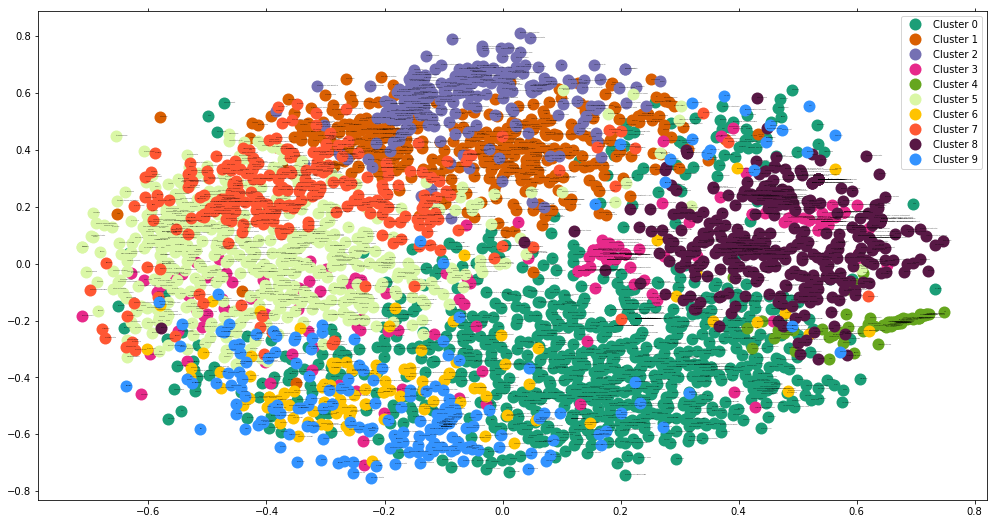

In [46]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=by_occ["Occ_title"])) 
#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=1)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [47]:
pd.set_option('display.max_colwidth', -1)
by_clust[['cluster','Occ_title']]

cluster  \
0  0         
1  1         
2  2         
3  3         
4  4         
5  5         
6  6         
7  7         
8  8         
9  9         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
dataset = by_occ[by_occ["cluster"]==9]["skill_title"].to_string()
def create_word_cloud(string):
   maskArray = npy.array(Image.open(r"C:\Users\SpirosAvgoustatos\Desktop\emp.png"))
   cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud9.png")
dataset = dataset.lower()
create_word_cloud(dataset)